### Datos Anómalos 

Paso 1: Crear un DataFrame con datos simulados
En este ejemplo, simulamos un conjunto de datos con valores atípicos para ilustrar su detección y tratamiento.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo con valores anómalos
np.random.seed(0)
data = {
    'Valor': np.append(np.random.normal(60, 10, 70), [1, 100, 130, 140, 150])  # Incluye 3 outliers
}

df = pd.DataFrame(data)

print("DataFrame con valores anómalos:")
print(df.tail())  # Muestra los últimos registros donde están los outliers


DataFrame con valores anómalos:
    Valor
70    1.0
71  100.0
72  130.0
73  140.0
74  150.0


#### Representación gráfica

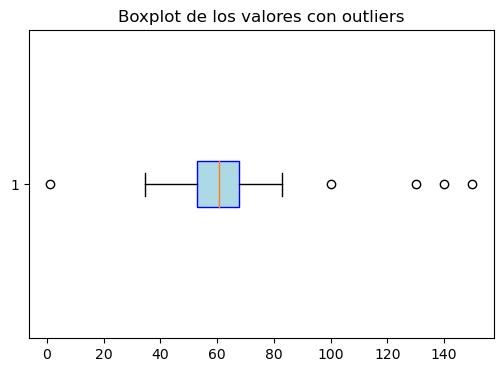

In [35]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Valor'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.title('Boxplot original de los valores con outliers')
plt.show()

* Evaluamos los datos anómalos como aquellos a una distancia de la media mayor que 3 veces la desviación estandar.

In [36]:
mean = df['Valor'].mean()
std_dev = df['Valor'].std()
threshold = 3
anomalies = df[(df['Valor'] > mean + threshold * std_dev) | (df['Valor'] < mean - threshold * std_dev)]
anomalies


,Valor
72,130.0
73,140.0
74,150.0


* Evaluamos los datos anómalos como aquellos a una distancia del Rango Intercuartílico de 1.5 veces el Rango Intercuartílico.

In [37]:
Q1 = df['Valor'].quantile(0.25)
Q3 = df['Valor'].quantile(0.75)
IQR = Q3 - Q1
anomalies = df[(df['Valor'] < (Q1 - 1.5 * IQR)) | (df['Valor'] > (Q3 + 1.5 * IQR))]
anomalies_severe = df[(df['Valor'] < (Q1 - 3 * IQR)) | (df['Valor'] > (Q3 + 3 * IQR))]

In [38]:
print(mean + threshold * std_dev)
print(Q1,Q3)
print(Q3 + 1.5 * IQR)
print(Q3 + 3 * IQR)

124.66595794080133
52.92687265908803 67.69264040489452
89.84129202360424
111.98994364231397


In [39]:
anomalies

,Valor
70,1.0
71,100.0
72,130.0
73,140.0
74,150.0


In [40]:
anomalies_severe

,Valor
70,1.0
72,130.0
73,140.0
74,150.0


#### Detección de Valores Anómalos: Métodos Basados en Modelos.


El parámetro `contamination=0.01` indica que el 1% de los datos orginales son anómalos.

In [39]:
from sklearn.ensemble import IsolationForest

# Crear el modelo Isolation Forest. 
iso_forest = IsolationForest(contamination=0.01)

# Índice lógico. -1 indica outliers
anomalies = iso_forest.fit_predict(df[['Valor']])==-1

df[anomalies]

c:\Users\javie\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Valor
100,1.0
103,140.0


Eliminar Anomalías: Puedes eliminar los registros con valores anómalos si se consideran errores o si no son relevantes para el análisis.

In [41]:
# Cálculo del cuartil 1 (Q1), cuartil 3 (Q3) y el rango intercuartílico (IQR)
Q1 = df['Valor'].quantile(0.25)
Q3 = df['Valor'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Eliminar los outliers
df_sin_outliers = df[(df['Valor'] >= limite_inferior) & (df['Valor'] <= limite_superior)]
print("\nDataFrame sin outliers:")
print(df_sin_outliers)



DataFrame sin outliers:
        Valor
0   77.640523
1   64.001572
2   69.787380
3   82.408932
4   78.675580
..        ...
65  55.982191
66  43.698017
67  64.627823
68  50.927016
69  60.519454

[70 rows x 1 columns]


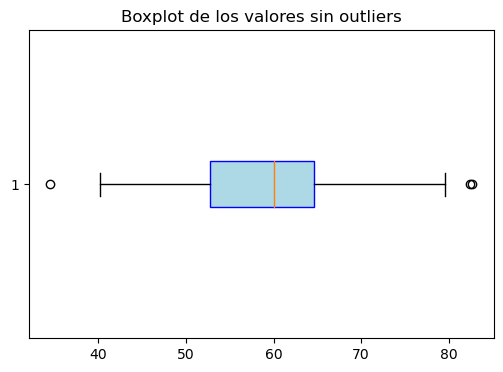

In [42]:
plt.figure(figsize=(6, 4))
plt.boxplot(df_sin_outliers['Valor'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.title('Boxplot de los valores sin outliers')
plt.show()

c:\Users\javie\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


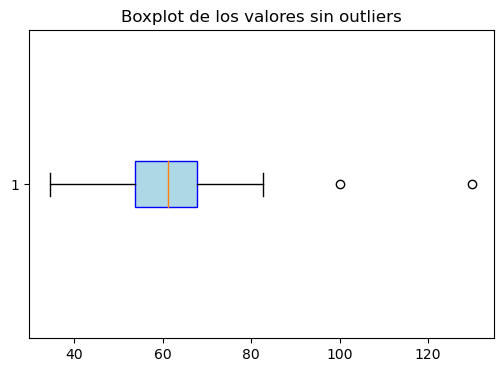

In [5]:
from sklearn.ensemble import IsolationForest

# Crear el modelo Isolation Forest. 
iso_forest = IsolationForest(contamination=0.01)

# Índice lógico. -1 indica outliers
anomalies = iso_forest.fit_predict(df[['Valor']])==-1

# Crear un DataFrame sin los outliers
df_sin_outliers = df[~anomalies]

plt.figure(figsize=(6, 4))
plt.boxplot(df_sin_outliers['Valor'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.title('Boxplot de los valores sin outliers')
plt.show()

* Podemos asinar un valor a los *outliers*

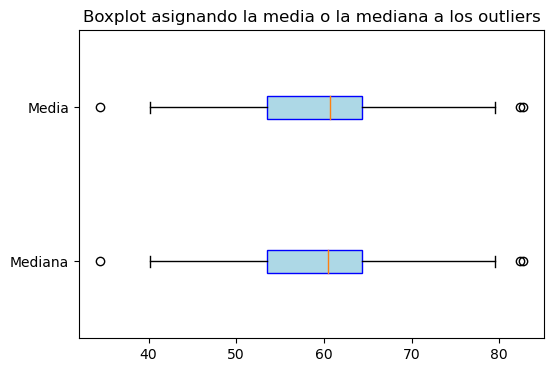

In [47]:
# Cálculo del cuartil 1 (Q1), cuartil 3 (Q3) y el rango intercuartílico (IQR)
Q1 = df['Valor'].quantile(0.25)
Q3 = df['Valor'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Calcular la mediana de la columna 'Valor'
mediana = df['Valor'].median()
media = df['Valor'].mean()

# Identificar los outliers (valores fuera de los límites)
outliers = (df['Valor'] < limite_inferior) | (df['Valor'] > limite_superior)

# Crear una copia del DataFrame original para no modificar el original directamente
df_outliers_mediana = df.copy()
# Crear una copia del DataFrame original para no modificar el original directamente
df_outliers_media = df.copy()

# Reemplazar los outliers por la mediana
df_outliers_mediana.loc[outliers, 'Valor'] = mediana
# Reemplazar los outliers por la mediana
df_outliers_media.loc[outliers, 'Valor'] = media

plt.figure(figsize=(6, 4))
plt.boxplot([df_outliers_mediana['Valor'],df_outliers_media['Valor']], vert= False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.yticks([1, 2], ['Mediana', 'Media'])
plt.title('Boxplot asignando la media o la mediana a los outliers')
plt.show()

### Transformar Datos: 
Aplicar transformaciones para reducir el impacto de los valores extremos. La elección de la transformación depende de la distribución de tus datos y el grado de impacto de los outliers.

#### Transformación Logarítmica:
* Se aplica cuando los datos tienen una distribución sesgada a la derecha (valores elevados y con dispersión).
* Esta transformación reduce la varianza de los datos y "comprime" los valores más grandes, disminuyendo el impacto de los outliers.
* Se utiliza cuando todos los valores son positivos.
#### Transformación de Raíz Cuadrada:
* También reduce el impacto de los valores altos pero en menor medida que la logarítmica.
* Puede ser útil si la distribución es sesgada y los valores son positivos.
#### Transformación de Box-Cox:
* Esta es una transformación más flexible que puede ajustarse automáticamente al conjunto de datos.
* Solo se puede aplicar a datos positivos.
* Si tus datos tienen una distribución normal, esta transformación es efectiva para hacerlos más simétricos.
#### Transformación de Yeo-Johnson:
* Similar a Box-Cox, pero tiene la ventaja de que puede manejar valores negativos y ceros.
* Es útil si tus datos tienen tanto valores negativos como positivos.


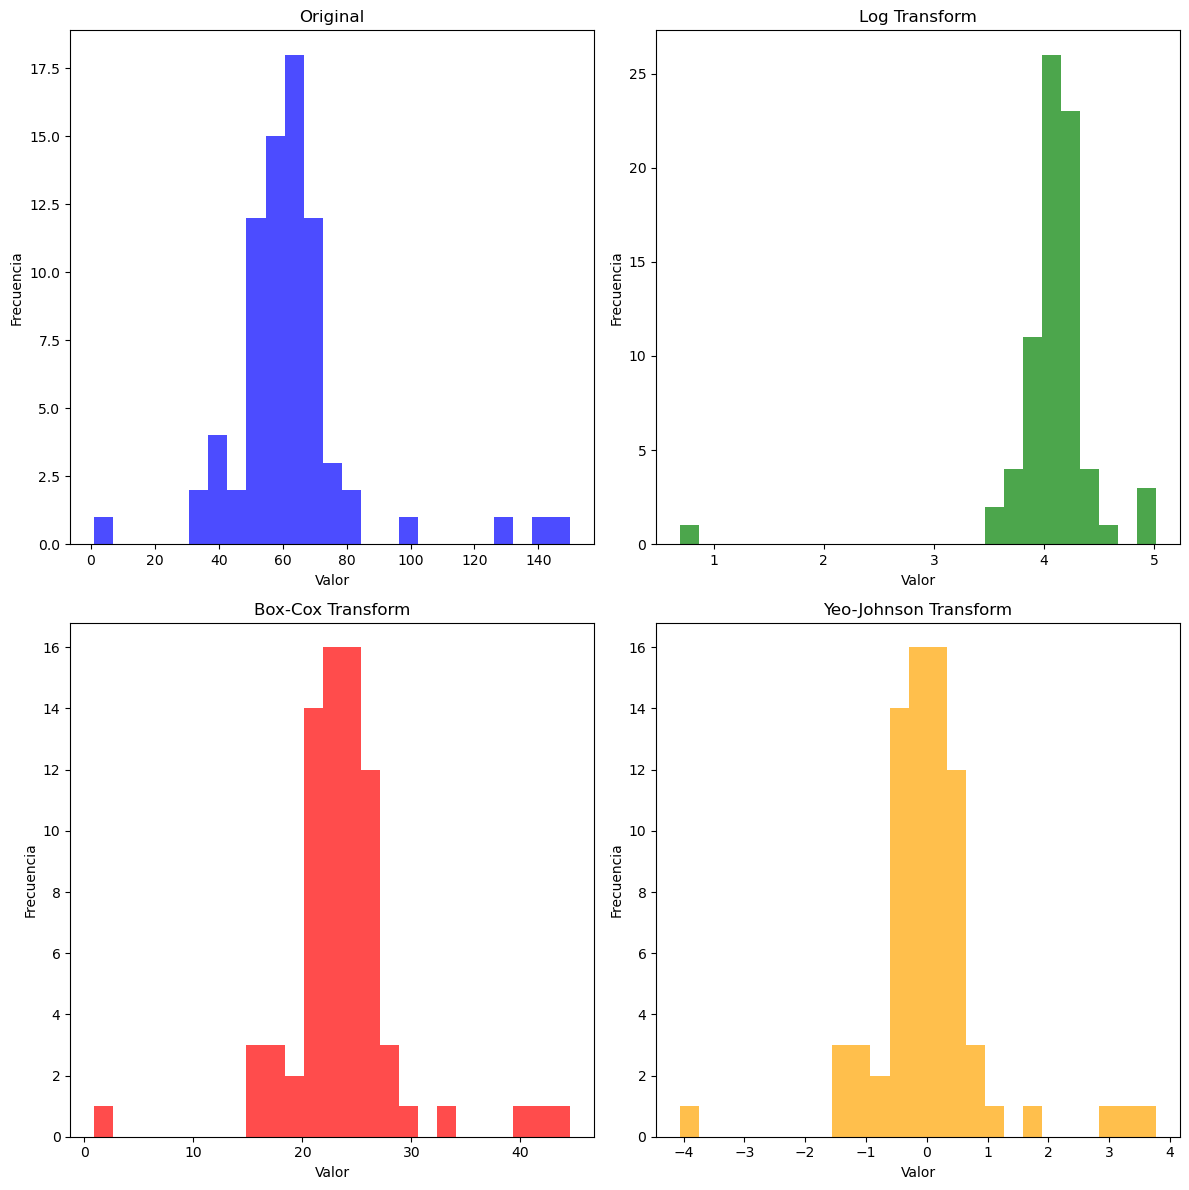

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer

# Datos con outliers
data = {
    'Valor': np.append(np.random.normal(60, 10, 70), [1, 100, 130, 140, 150])
}
df = pd.DataFrame(data)

# Aplicar transformación logarítmica
df['Valor_log'] = np.log(df['Valor'] + 1)

# Aplicar transformación de Box-Cox
df['Valor_boxcox'], _ = stats.boxcox(df['Valor'] + 1)

# Aplicar transformación de Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')
df['Valor_yeojohnson'] = pt.fit_transform(df[['Valor']])

# Definir los límites comunes de los ejes para todas las gráficas
x_min = min(df[[ 'Valor_log', 'Valor_boxcox', 'Valor_yeojohnson']].min())
x_max = max(df[[ 'Valor_log', 'Valor_boxcox', 'Valor_yeojohnson']].max())

# Visualizar transformaciones
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.hist(df['Valor'], bins=25, color='blue', alpha=0.7)
#plt.xlim(x_min, x_max)  # Ajuste del eje x
plt.title('Original')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 2)
plt.hist(df['Valor_log'], bins=25, color='green', alpha=0.7)
#plt.xlim(x_min, x_max)  # Ajuste del eje x
plt.title('Log Transform')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 3)
plt.hist(df['Valor_boxcox'], bins=25, color='red', alpha=0.7)
#plt.xlim(x_min, x_max)  # Ajuste del eje x
plt.title('Box-Cox Transform')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 4)
plt.hist(df['Valor_yeojohnson'], bins=25, color='orange', alpha=0.7)
#plt.xlim(x_min, x_max)  # Ajuste del eje x
plt.title('Yeo-Johnson Transform')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
